In [2]:
#LIBRARIES
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# FILE READING 
data=pd.read_csv("D:\\PROJECTS\\COVID_!9\\cleaned_owid-covid-data.csv")
df=pd.DataFrame(data)
df.shape
df.head()



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
df['date']=pd.to_datetime(df['date'])
sns.set(style='whitegrid')


C:\Users\kshitij kusram\AppData\Local\Temp\ipykernel_15520\159115270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cases.values,y=top_10_cases.index,palette='Reds_r')


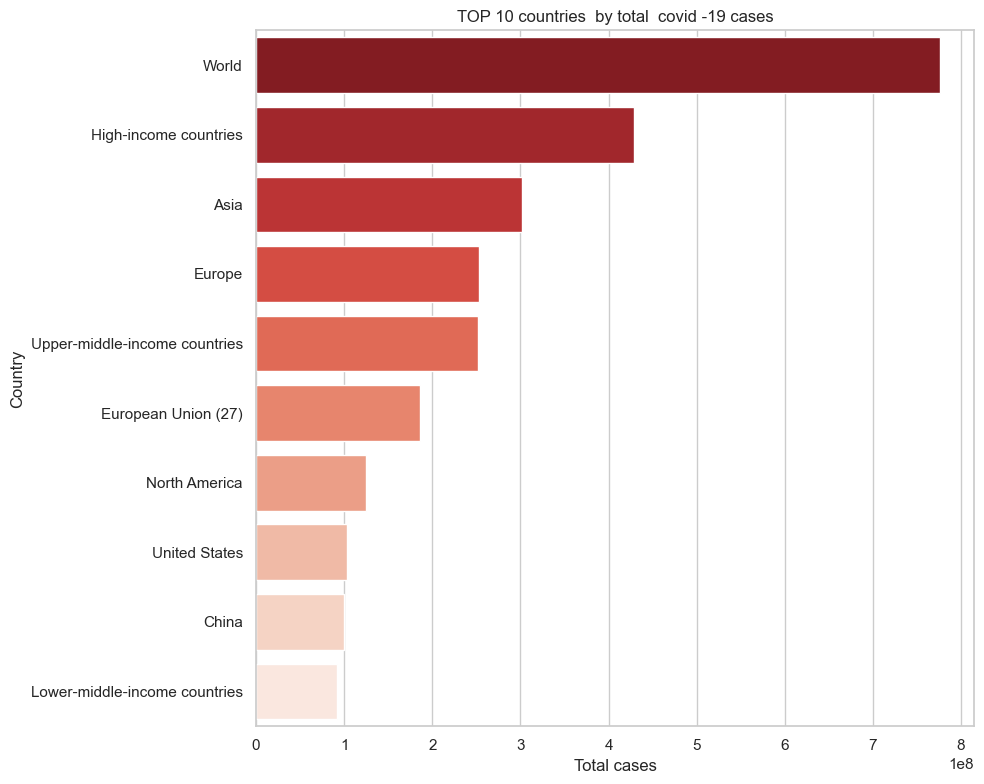

In [4]:
# TOP 10 countries by total cases
top_10_cases=df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_cases.values,y=top_10_cases.index,palette='Reds_r')
plt.title('TOP 10 countries  by total  covid -19 cases')
plt.xlabel('Total cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

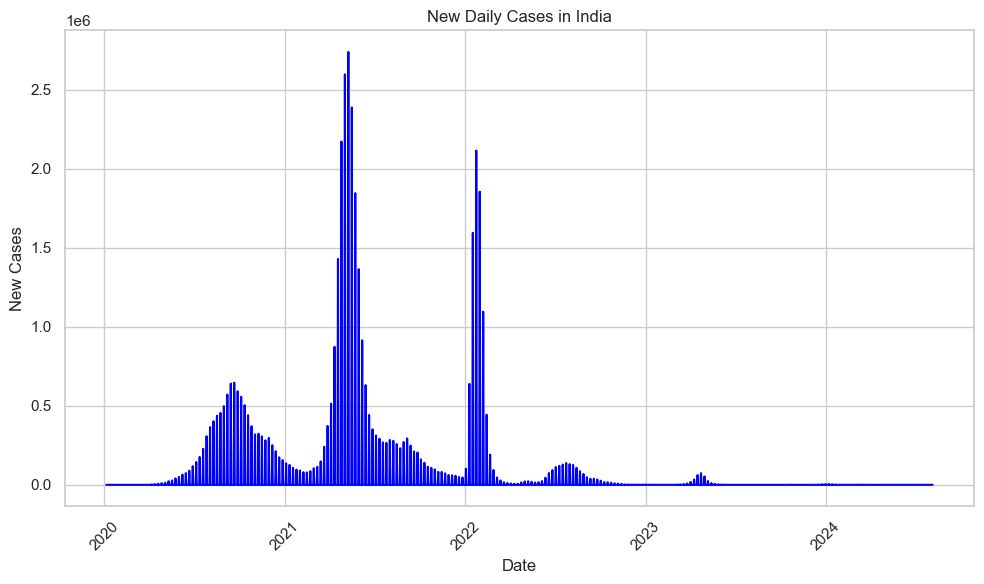

In [5]:
# new daily cases over time 
india=df[df['location']=='India']
plt.figure(figsize=(10,6))
plt.plot(india['date'],india['new_cases'],color='blue')
plt.title("New Daily Cases in India")
plt.xlabel('Date')
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


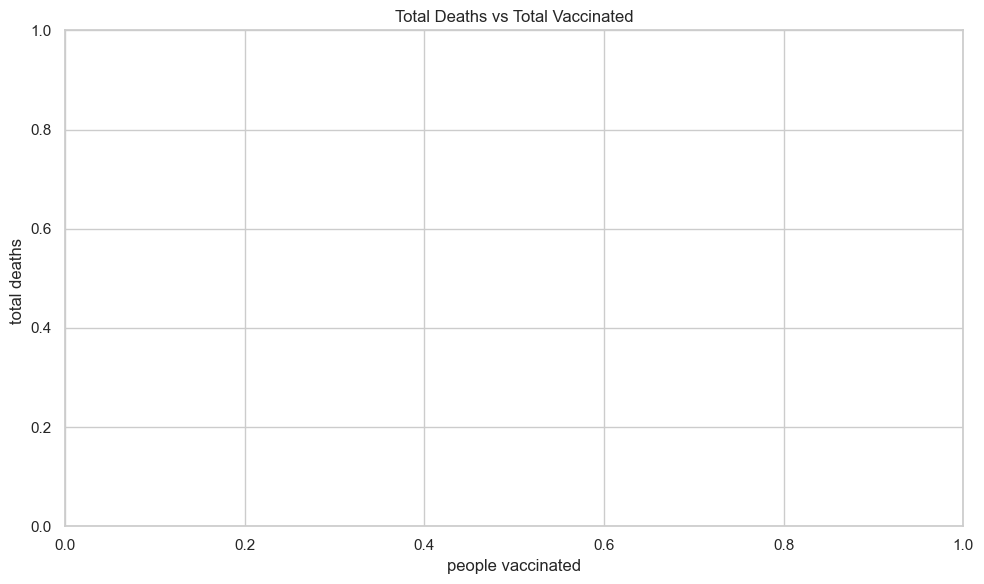

In [8]:
#Total Death VS Total Vaccinated 

latest=df[df['date']==df['date'].max()]
plt.figure(figsize=(10,6))
sns.scatterplot(data=latest,x='people_vaccinated',y='total_deaths',hue='location',legend=False)
plt.title("Total Deaths vs Total Vaccinated")
plt.xlabel("people vaccinated")
plt.ylabel("total deaths ")
plt.tight_layout()
plt.show()

In [7]:
df['people_vaccinated']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
429430   NaN
429431   NaN
429432   NaN
429433   NaN
429434   NaN
Name: people_vaccinated, Length: 429435, dtype: float64

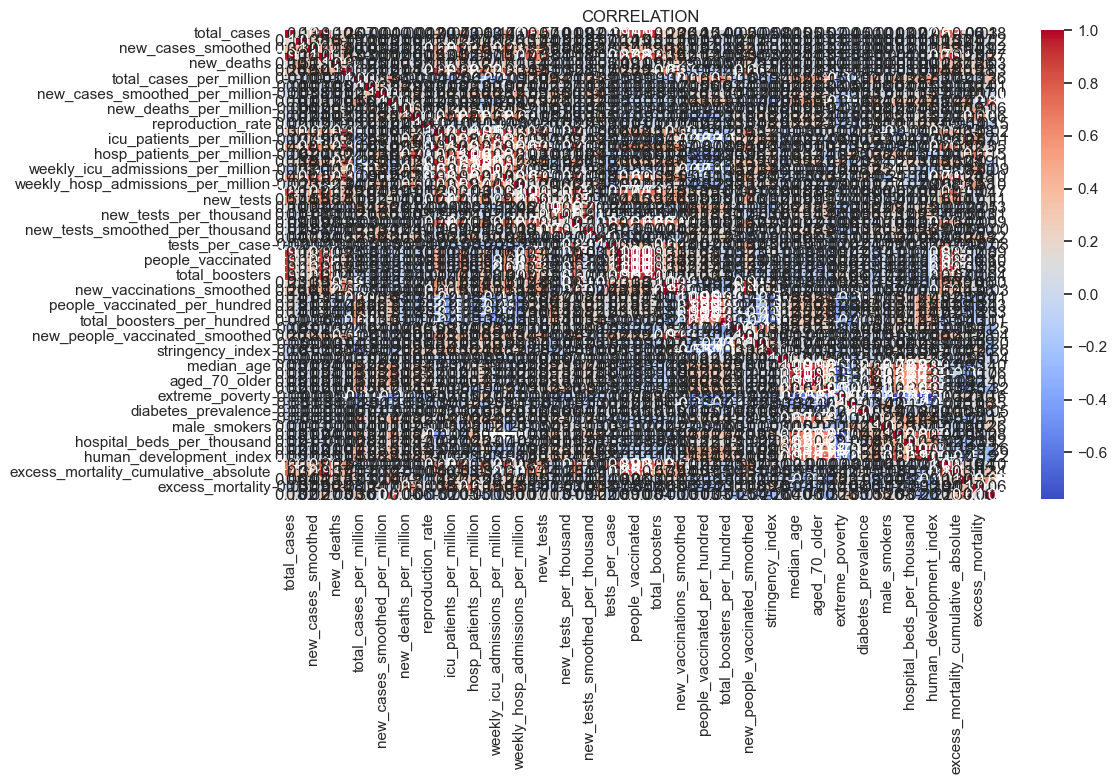

In [11]:
#Correlation

numeric_df=df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("CORRELATION")
plt.tight_layout()
plt.show()